### Least-squares filter design


In [15]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [16]:
from sclibrary.data_reader.network_reader import NetworkReader
from sclibrary.sc.simplicial_complex import SimplicialComplexNetwork
from sclibrary.plot import SCPlot
import numpy as np


data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, 
                           src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)

simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# coordinates
filename = data_folder + '/coordinates.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")


# create a simplicial complex network
sc = SimplicialComplexNetwork(simplices=simplices)
scplot = SCPlot(sc, coordinates)

FileNotFoundError: [Errno 2] No such file or directory: 'data/paper_data/edges.csv'

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


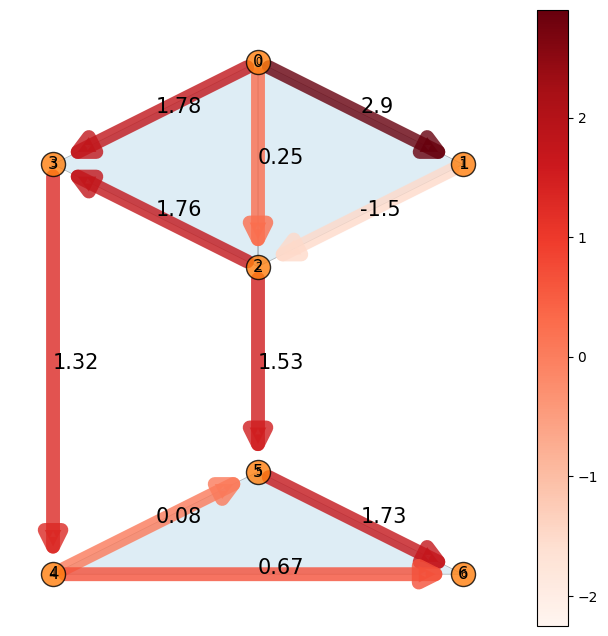

In [17]:


from sclibrary.filters.ls_filter_design import LSFilterDesign


f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

scplot.draw_flow(flow=f)

lsfilter = LSFilterDesign(simplicial_complex=sc)

#### Subcomponent extraction type I - L1 = L2 = L and α = β

Error: 0.38560431954906266


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


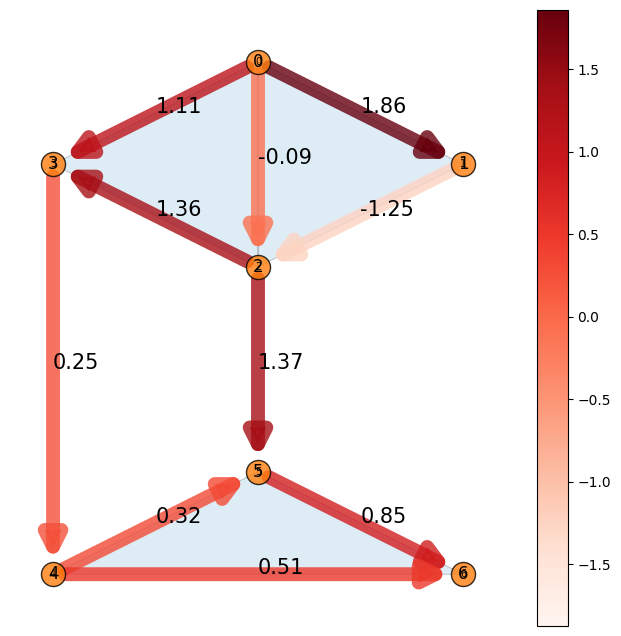

In [18]:
filter_size = 4

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f0))

scplot.draw_flow(np.round(f_estimated, 2))

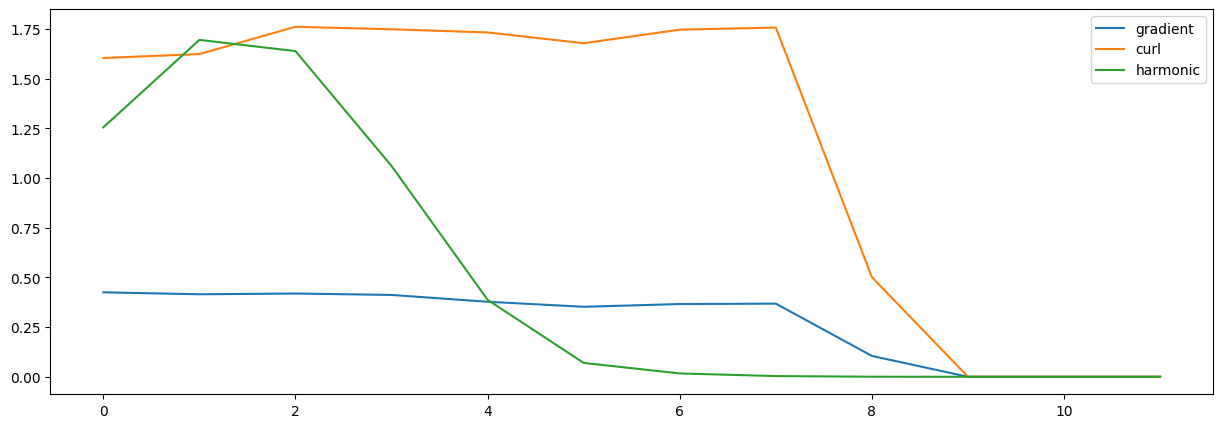

In [19]:
import matplotlib.pyplot as plt

filter_size = 12
plt.figure(figsize=(15, 5))

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"], label="gradient")

# curl
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="curl", f=f,
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"], label="curl")

# harmonic 
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="harmonic", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"], label="harmonic")

plt.legend()

#### Subcomponent extraction type II - L1 != L2 and α != β

Error: 0.3434840114724925


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


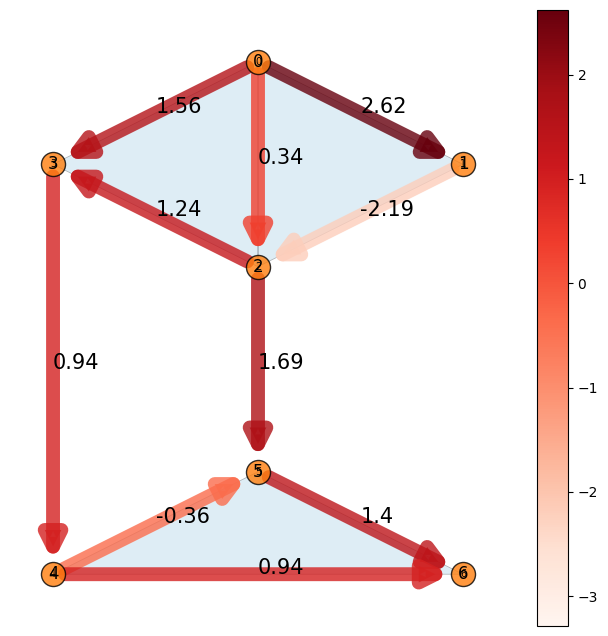

In [20]:
filter_range = 4

lsfilter.subcomponent_extraction_type_two(
    L=filter_range, component="gradient", f=f
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f0))

scplot.draw_flow(np.round(f_estimated, 2))

Error: 0.37677359072322875


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


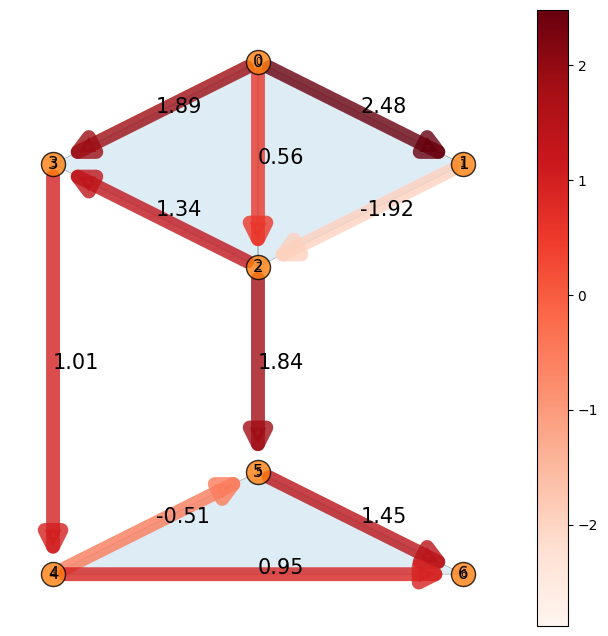

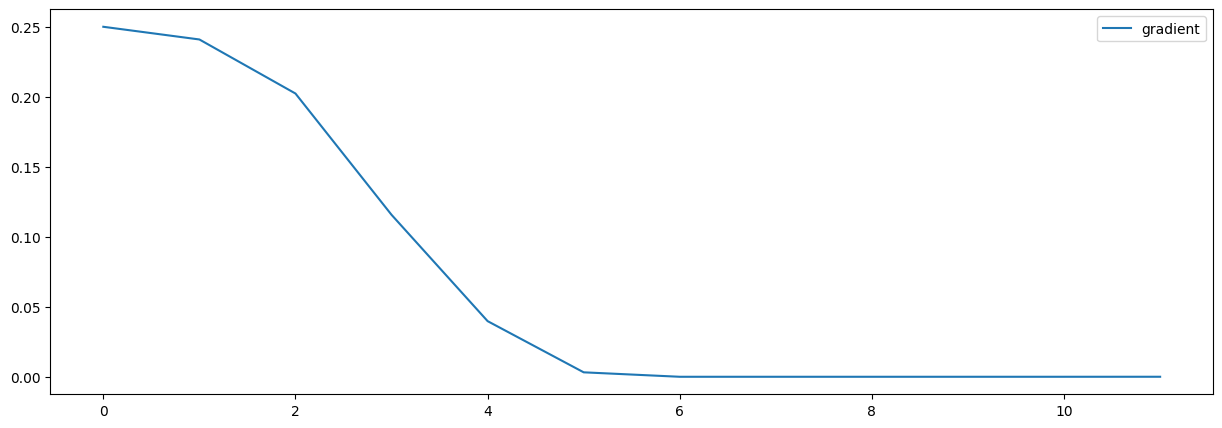

In [21]:
filter_range = 12

lsfilter.subcomponent_extraction_type_two(
    L=filter_range, component="gradient", f=f
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f0))

scplot.draw_flow(np.round(f_estimated, 2))

# plot the error
plt.figure(figsize=(15, 5))
plt.plot(range(filter_range), lsfilter.history["error_per_filter_size"], label="gradient")
plt.legend()

#### General Filter

Error: 0.4568487311086471


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


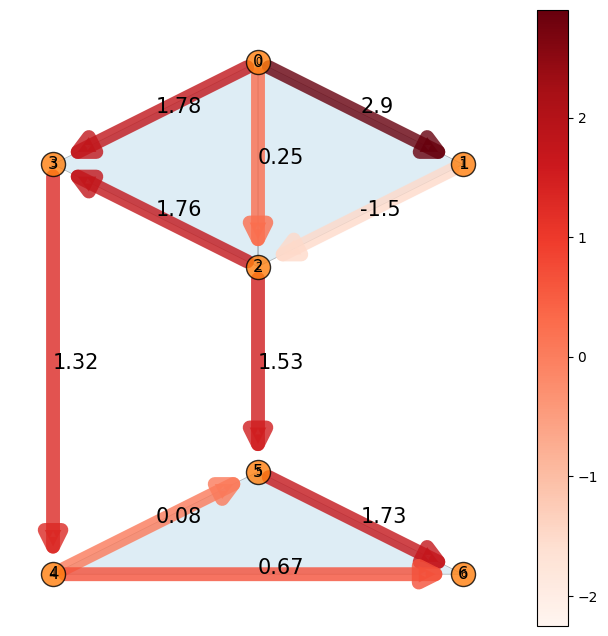

In [22]:
lsfilter = LSFilterDesign(simplicial_complex=sc)

f_est_h, f_est_c, f_est_g = lsfilter.general_filter(
    L1 = 1, L2 = 1, f=f,
)

f_est = f_est_h + f_est_c + f_est_g
print("Error:", lsfilter.calculate_error(f_est, f0))

scplot.draw_flow(np.round(f_est, 2))

In [23]:
lsfilter.history

{'L1': {'filter': array([[0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569]],
        dtype=object),
  'f_estimated': array([ 2.48571429,  0.21428571,  1.52571429, -1.28571429,  1.50857143,
          1.31142857,  1.13142857,  0.06857143,  0.57428571,  1.48285714]),
  'frequency_responses': array([[0.